In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Importing Images Data

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_dataset = train_datagen.flow_from_directory(
    'data/train',
    target_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = 'categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_dataset = test_datagen.flow_from_directory(
    'data/test',
    target_size = (48, 48),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = 'categorical',
    shuffle=True
)

Found 7178 images belonging to 7 classes.


## Creating Covnet

In [11]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [12]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [13]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, min_lr=1e-6, verbose=1)

In [14]:
history = model.fit(x=train_dataset, validation_data=test_dataset, epochs=75, callbacks=[reduce_lr])

Epoch 1/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 98s 214ms/step - accuracy: 0.2456 - loss: 3.1820 - val_accuracy: 0.1368 - val_loss: 5.8068 - learning_rate: 1.0000e-04
Epoch 2/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 96s 213ms/step - accuracy: 0.3222 - loss: 1.7056 - val_accuracy: 0.3894 - val_loss: 1.5624 - learning_rate: 1.0000e-04
Epoch 3/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 96s 213ms/step - accuracy: 0.3628 - loss: 1.6338 - val_accuracy: 0.4354 - val_loss: 1.4765 - learning_rate: 1.0000e-04
Epoch 4/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 96s 213ms/step - accuracy: 0.3851 - loss: 1.5589 - val_accuracy: 0.3989 - val_loss: 1.5425 - learning_rate: 1.0000e-04
Epoch 5/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 96s 214ms/step - accuracy: 0.4025 - loss: 1.5286 - val_accuracy: 0.4744 - val_loss: 1.3641 - learning_rate: 1.0000e-04
Epoch 6/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 214ms/step - accuracy: 0.4325 - loss: 1.4751 - val_accuracy: 0.4950 - val_loss: 1.3283 - learning_rate: 1.0000e-04
Epoch 7/75
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 21

## Model Summary

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 23, 23, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 23, 23, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 23, 23, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │    31,720,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,232,848 (245.03 MB)

 Trainable params: 32,116,103 (122.51 MB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 32,116,105 (122.51 MB)

## Model Evaluation

In [18]:
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)
print(f"Test Accuracy (Direct Evaluation): {test_accuracy * 100:.2f}%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.6657 - loss: 1.2901
Test Accuracy (Direct Evaluation): 66.33%


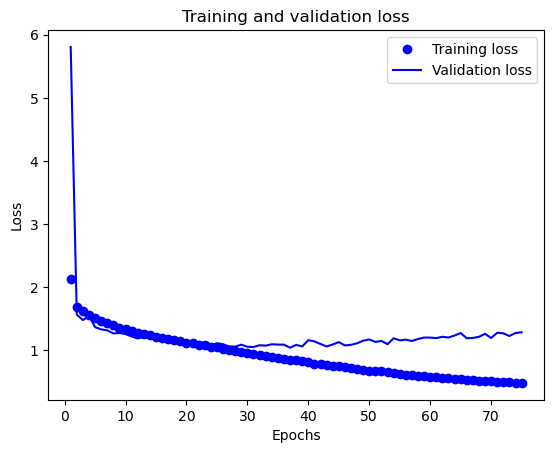

In [16]:
import matplotlib.pyplot as plt

# Plot the train and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

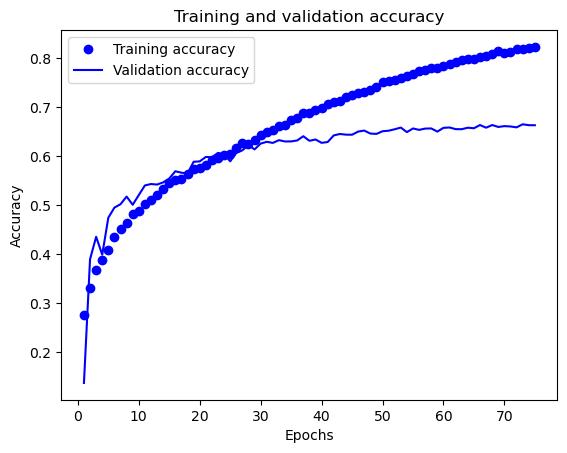

In [17]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Save and Load the Model

In [19]:
model.save('FERClassifier.keras')
model = load_model('FERClassifier.keras')

## Training Dataset Heatmap

/opt/anaconda3/envs/ml/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step


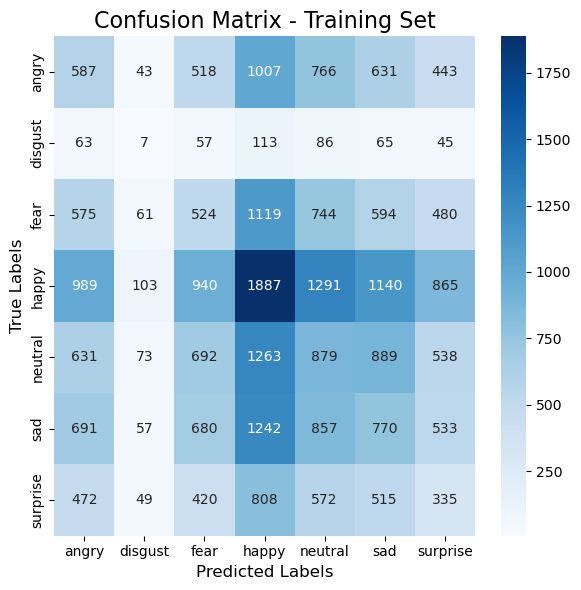

In [139]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Generate predictions
y_pred = model.predict(train_dataset)
y_pred = np.argmax(y_pred, axis=1)

class_labels = train_dataset.class_indices
class_labels = {v: k for k, v in class_labels.items()}
target_names = list(class_labels.values())

cm_train = confusion_matrix(train_dataset.classes, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 6))

train_heatmap = sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='d', cbar=True, xticklabels=target_names, yticklabels=target_names)

# Customize plot
plt.title("Confusion Matrix - Training Set", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Display plot
plt.tight_layout()
plt.show()

## Test Dataset Heatmap

113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step


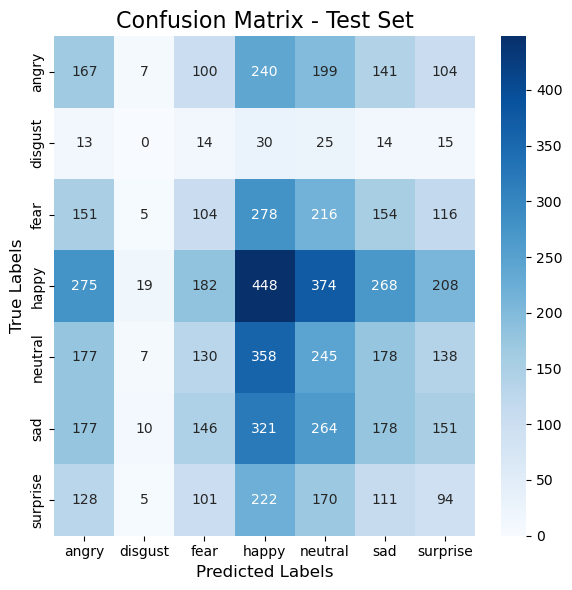

In [28]:
y_test_pred = model.predict(test_dataset)
y_test_pred = np.argmax(y_test_pred, axis=1)

plt.figure(figsize = (6, 6))

cm_test = confusion_matrix(test_dataset.classes, y_test_pred)

test_heatmap = sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='d', cbar=True, xticklabels=target_names, yticklabels=target_names)

# Customize plot
plt.title("Confusion Matrix - Test Set", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Display plot
plt.tight_layout()
plt.show()

## F1 Score

In [129]:
from sklearn.metrics import f1_score

batch = next(test_dataset)

images, labels = batch
predictions = model.predict(images)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

f1 = f1_score(true_labels, pred_labels, average='weighted')

print(f"F1 Score: {f1*100:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
F1 Score: 75.41


## Correctly Classified Images from Test Dataset

In [23]:
batch = next(test_dataset)

images, labels = batch
predictions = model.predict(images)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

correct_indices = np.where(pred_labels == true_labels)[0]

print(f"{len(correct_indices)} correct out of {len(pred_labels)}")
print(f"Accuracy (Random Batch): {len(correct_indices)/len(pred_labels) * 100}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
45 correct out of 64
Accuracy (Random Batch): 70.3125


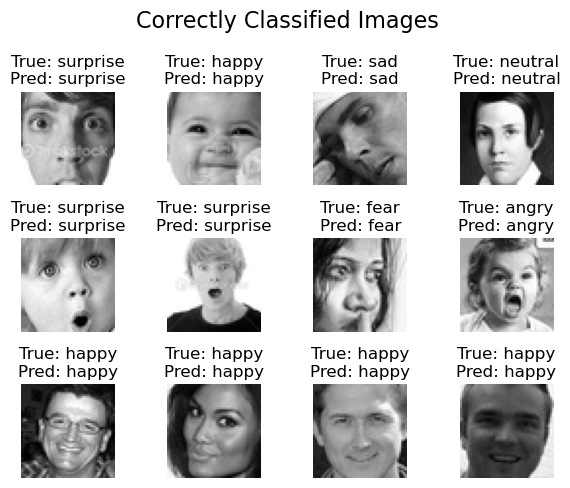

In [24]:
plt.figure(figsize=(6, 6))

for i, idx in enumerate(correct_indices[:12]):
    plt.subplot(4, 4, i + 1)
    plt.title(f"True: {target_names[true_labels[idx]]}\nPred: {target_names[pred_labels[idx]]}")
    plt.axis('off')
    plt.imshow(images[idx], cmap='gray')

plt.tight_layout()
plt.suptitle("Correctly Classified Images", fontsize=16, y=1.05)
plt.show()

## Incorrectly Classified Images from Test Dataset

In [54]:
batch = next(test_dataset)

images, labels = batch
predictions = model.predict(images)
pred_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

correct_indices = np.where(pred_labels != true_labels)[0]

print(f"{len(correct_indices)} incorrect out of {len(pred_labels)}")
print(f"Misclassfication Rate (Random Batch): {len(correct_indices)/len(pred_labels) * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
16 incorrect out of 64
Loss (Random Batch): 25.00%


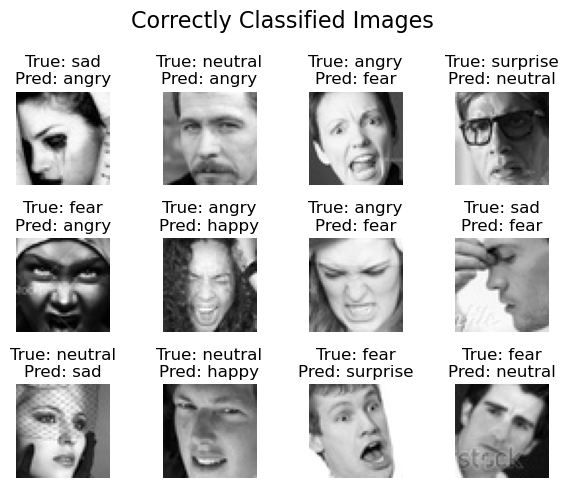

In [55]:
plt.figure(figsize=(6, 6))

for i, idx in enumerate(correct_indices[:12]):
    plt.subplot(4, 4, i + 1)
    plt.title(f"True: {target_names[true_labels[idx]]}\nPred: {target_names[pred_labels[idx]]}")
    plt.axis('off')
    plt.imshow(images[idx], cmap='gray')

plt.tight_layout()
plt.suptitle("Correctly Classified Images", fontsize=16, y=1.05)
plt.show()